In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Let's generate data and calulate the closed form of the linear regression
# so that we can compare with the results obtained by SGD
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X  + 3.2*X**2 + np.random.randn(100, 1)

In [3]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.axis([0, len(X_train), 0, 3])

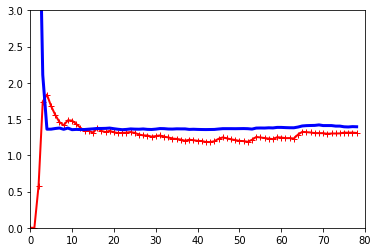

In [4]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

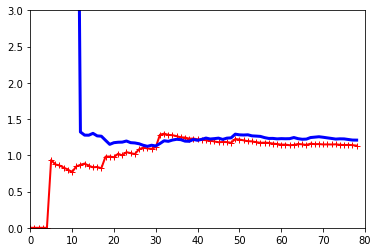

In [5]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4, include_bias=False)),
    ('lin_reg', LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)